<a href="https://colab.research.google.com/github/EmperoR1127/CSI5155_project/blob/master/csi5155_assignment_2_part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
from scipy.io import arff
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/drive/My Drive/Images/"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
#load four dataset
seismic_bumps_data = pd.DataFrame(arff.loadarff('/content/drive/My Drive/Data/seismic-bumps.arff')[0])
labor_neg_data = pd.read_csv("/content/drive/My Drive/Data/labor-neg.csv")
iris_data = pd.read_csv("/content/drive/My Drive/Data/iris.csv")
voting_data = pd.read_csv("/content/drive/My Drive/Data/voting-records.csv")

In [6]:
#process the seismic_bumps_data
#pre-process the train_set
sb_train_labels = seismic_bumps_data[["class"]].copy()
sb_train_set = seismic_bumps_data.drop(["class"], axis=1)
sb_train_labels["class"] = sb_train_labels["class"].map(lambda x: str(x)[2])
sb_train_set_num = seismic_bumps_data.drop(["seismic","seismoacoustic","shift", "ghazard", "class"], axis=1)
sb_train_set_cat = seismic_bumps_data.drop(["genergy","gpuls","gdenergy", "gdpuls", "nbumps", "nbumps2", "nbumps3", "nbumps4", "nbumps5", "nbumps6", "nbumps7", "nbumps89", "energy", "maxenergy", "class"], axis=1)
#build the pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
sb_num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])
sb_full_pipeline = ColumnTransformer([("num", sb_num_pipeline, list(sb_train_set_num)),("cat", OneHotEncoder(), list(sb_train_set_cat)),])
#prepare the data
sb_train_set_prepared = sb_full_pipeline.fit_transform(sb_train_set)
#prepare the target
sb_encoder = LabelEncoder()
sb_train_labels_prepared = sb_encoder.fit_transform(sb_train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#process the labor_neg_data
ln_train_labels = labor_neg_data['class'].copy()
ln_train_set = labor_neg_data.drop(["class"], axis = 1)
ln_train_set_num = ln_train_set.drop(["cola","pension","educ_allw", "vacation", "lngtrm_disabil", "dntl_ins", "bereavement", "empl_hplan"], axis=1)
ln_train_set_cat = ln_train_set.drop(["dur","wage1","wage2", "wage3", "hours", "stby_pay", "shift_diff", "holidays"], axis=1)
#build the pipeline
ln_num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])
ln_full_pipeline = ColumnTransformer([("num", ln_num_pipeline, list(ln_train_set_num)),("cat", OneHotEncoder(), list(ln_train_set_cat)),])
#prepare the data
ln_train_set_prepared = ln_full_pipeline.fit_transform(ln_train_set)
#prepare the target
ln_encoder = LabelEncoder()
ln_train_labels_prepared = ln_encoder.fit_transform(ln_train_labels)

In [0]:
#process the iris_data
ir_train_labels = iris_data['class'].copy()
ir_train_set = iris_data.drop(["class"], axis = 1)
#build the pipeline
ir_num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])
ir_full_pipeline = ColumnTransformer([("num", ir_num_pipeline, list(ir_train_set)),])
#prepare the data
ir_train_set_prepared = ir_full_pipeline.fit_transform(ir_train_set)
#prepare the target
ir_encoder = LabelEncoder()
ir_train_labels_prepared = ir_encoder.fit_transform(ir_train_labels)

In [0]:
#process the voting_data
vd_train_labels = voting_data['Class'].copy()
vd_train_set = voting_data.drop(["Class"], axis = 1)
#build the pipeline
vd_full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), list(vd_train_set)),])
#prepare the data
vd_train_set_prepared = vd_full_pipeline.fit_transform(vd_train_set)
#prepare the target
vd_encoder = LabelEncoder()
vd_train_labels_prepared = vd_encoder.fit_transform(vd_train_labels)

In [10]:
#train the model using DECISION TREE algorithm with 10 fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
score_method = make_scorer(accuracy_score)
dt_clf = DecisionTreeClassifier()

dt_sb_train_prediction = cross_val_predict(dt_clf.fit(sb_train_set_prepared, sb_train_labels_prepared), sb_train_set_prepared, sb_train_labels_prepared, cv=10)
dt_sb_accuracy_score = accuracy_score(sb_train_labels_prepared, dt_sb_train_prediction)
print("The accuracies of the DECISION TREE algorithm trained against seismic_bumps_data is + %f " % dt_sb_accuracy_score)
print("-----------------------------------------")
dt_ln_train_prediction = cross_val_predict(dt_clf.fit(ln_train_set_prepared, ln_train_labels_prepared), ln_train_set_prepared, ln_train_labels_prepared, cv=10)
dt_ln_accuracy_score = accuracy_score(ln_train_labels_prepared, dt_ln_train_prediction)
print("The accuracies of the DECISION TREE algorithm trained against labor_neg_data is + %f " % dt_ln_accuracy_score)
print("-----------------------------------------")
dt_ir_train_prediction = cross_val_predict(dt_clf.fit(ir_train_set_prepared, ir_train_labels_prepared), ir_train_set_prepared, ir_train_labels_prepared, cv=10)
dt_ir_accuracy_score = accuracy_score(ir_train_labels_prepared, dt_ir_train_prediction)
print("The accuracies of the DECISION TREE algorithm trained against iris_data is + %f " % dt_ir_accuracy_score)
print("-----------------------------------------")
dt_vd_train_prediction = cross_val_predict(dt_clf.fit(vd_train_set_prepared, vd_train_labels_prepared), vd_train_set_prepared, vd_train_labels_prepared, cv=10)
dt_vd_accuracy_score = accuracy_score(vd_train_labels_prepared, dt_vd_train_prediction)
print("The accuracies of the DECISION TREE algorithm trained against voting_data is + %f " % dt_vd_accuracy_score)

The accuracies of the DECISION TREE algorithm trained against seismic_bumps_data is + 0.841718 
-----------------------------------------
The accuracies of the DECISION TREE algorithm trained against labor_neg_data is + 0.859649 
-----------------------------------------
The accuracies of the DECISION TREE algorithm trained against iris_data is + 0.953333 
-----------------------------------------
The accuracies of the DECISION TREE algorithm trained against voting_data is + 0.942529 


In [11]:
#train the model using K NEAREST NEIGHBOURS algorithm with 10 fold cross validation
from sklearn import neighbors
n_neighbors = 5
knn_clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')

knn_sb_train_prediction = cross_val_predict(knn_clf.fit(sb_train_set_prepared, sb_train_labels_prepared), sb_train_set_prepared, sb_train_labels_prepared, cv=10)
knn_sb_accuracy_score = accuracy_score(sb_train_labels_prepared, knn_sb_train_prediction)
print("The accuracies of K NEAREST NEIGHBOURS algorithm trained against seismic_bumps_data is + %f " % knn_sb_accuracy_score)
print("-----------------------------------------")
knn_ln_train_prediction = cross_val_predict(knn_clf.fit(ln_train_set_prepared, ln_train_labels_prepared), ln_train_set_prepared, ln_train_labels_prepared, cv=10)
knn_ln_accuracy_score = accuracy_score(ln_train_labels_prepared, knn_ln_train_prediction)
print("The accuracies of K NEAREST NEIGHBOURS algorithm trained against labor_neg_data is + %f " % knn_ln_accuracy_score)
print("-----------------------------------------")
knn_ir_train_prediction = cross_val_predict(knn_clf.fit(ir_train_set_prepared, ir_train_labels_prepared), ir_train_set_prepared, ir_train_labels_prepared, cv=10)
knn_ir_accuracy_score = accuracy_score(ir_train_labels_prepared, knn_ir_train_prediction)
print("The accuracies of K NEAREST NEIGHBOURS algorithm trained against iris_data is + %f " % knn_ir_accuracy_score)
print("-----------------------------------------")
knn_vd_train_prediction = cross_val_predict(knn_clf.fit(vd_train_set_prepared, vd_train_labels_prepared), vd_train_set_prepared, vd_train_labels_prepared, cv=10)
knn_vd_accuracy_score = accuracy_score(vd_train_labels_prepared, knn_vd_train_prediction)
print("The accuracies of K NEAREST NEIGHBOURS algorithm trained against voting_data is + %f " % knn_vd_accuracy_score)

The accuracies of K NEAREST NEIGHBOURS algorithm trained against seismic_bumps_data is + 0.908282 
-----------------------------------------
The accuracies of K NEAREST NEIGHBOURS algorithm trained against labor_neg_data is + 0.947368 
-----------------------------------------
The accuracies of K NEAREST NEIGHBOURS algorithm trained against iris_data is + 0.953333 
-----------------------------------------
The accuracies of K NEAREST NEIGHBOURS algorithm trained against voting_data is + 0.921839 


In [12]:
#train the model using NAIVE BAYES algorithm with 10 fold cross validation
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

gnb_sb_train_prediction = cross_val_predict(gnb_clf.fit(sb_train_set_prepared, sb_train_labels_prepared), sb_train_set_prepared, sb_train_labels_prepared, cv=10)
gnb_sb_accuracy_score = accuracy_score(sb_train_labels_prepared, gnb_sb_train_prediction)
print("The accuracies of NAIVE BAYES algorithm trained against seismic_bumps_data is + %f " % gnb_sb_accuracy_score)
print("-----------------------------------------")
gnb_ln_train_prediction = cross_val_predict(gnb_clf.fit(ln_train_set_prepared, ln_train_labels_prepared), ln_train_set_prepared, ln_train_labels_prepared, cv=10)
gnb_ln_accuracy_score = accuracy_score(ln_train_labels_prepared, gnb_ln_train_prediction)
print("The accuracies of NAIVE BAYES algorithm trained against labor_neg_data is + %f " % gnb_ln_accuracy_score)
print("-----------------------------------------")
gnb_ir_train_prediction = cross_val_predict(gnb_clf.fit(ir_train_set_prepared, ir_train_labels_prepared), ir_train_set_prepared, ir_train_labels_prepared, cv=10)
gnb_ir_accuracy_score = accuracy_score(ir_train_labels_prepared, gnb_ir_train_prediction)
print("The accuracies of NAIVE BAYES algorithm trained against iris_data is + %f " % gnb_ir_accuracy_score)
print("-----------------------------------------")
gnb_vd_train_prediction = cross_val_predict(gnb_clf.fit(vd_train_set_prepared, vd_train_labels_prepared), vd_train_set_prepared, vd_train_labels_prepared, cv=10)
gnb_vd_accuracy_score = accuracy_score(vd_train_labels_prepared, gnb_vd_train_prediction)
print("The accuracies of NAIVE BAYES algorithm trained against voting_data is + %f " % gnb_vd_accuracy_score)

The accuracies of NAIVE BAYES algorithm trained against seismic_bumps_data is + 0.382740 
-----------------------------------------
The accuracies of NAIVE BAYES algorithm trained against labor_neg_data is + 0.929825 
-----------------------------------------
The accuracies of NAIVE BAYES algorithm trained against iris_data is + 0.953333 
-----------------------------------------
The accuracies of NAIVE BAYES algorithm trained against voting_data is + 0.944828 


In [13]:
#train the model using RULE BASED algorithm with 10 fold cross validation
from sklearn.dummy import DummyClassifier
dc_clf = DummyClassifier(strategy='stratified')

dc_sb_train_prediction = cross_val_predict(dc_clf.fit(sb_train_set_prepared, sb_train_labels_prepared), sb_train_set_prepared, sb_train_labels_prepared, cv=10)
dc_sb_accuracy_score = accuracy_score(sb_train_labels_prepared, dc_sb_train_prediction)
print("The accuracies of RULE BASED algorithm trained against seismic_bumps_data is + %f " % dc_sb_accuracy_score)
print("-----------------------------------------")
dc_ln_train_prediction = cross_val_predict(dc_clf.fit(ln_train_set_prepared, ln_train_labels_prepared), ln_train_set_prepared, ln_train_labels_prepared, cv=10)
dc_ln_accuracy_score = accuracy_score(ln_train_labels_prepared, dc_ln_train_prediction)
print("The accuracies of RULE BASED algorithm trained against labor_neg_data is + %f " % dc_ln_accuracy_score)
print("-----------------------------------------")
dc_ir_train_prediction = cross_val_predict(dc_clf.fit(ir_train_set_prepared, ir_train_labels_prepared), ir_train_set_prepared, ir_train_labels_prepared, cv=10)
dc_ir_accuracy_score = accuracy_score(ir_train_labels_prepared, dc_ir_train_prediction)
print("The accuracies of RULE BASED algorithm trained against iris_data is + %f " % dc_ir_accuracy_score)
print("-----------------------------------------")
dc_vd_train_prediction = cross_val_predict(dc_clf.fit(vd_train_set_prepared, vd_train_labels_prepared), vd_train_set_prepared, vd_train_labels_prepared, cv=10)
dc_vd_accuracy_score = accuracy_score(vd_train_labels_prepared, dc_vd_train_prediction)
print("The accuracies of RULE BASED algorithm trained against voting_data is + %f " % dc_vd_accuracy_score)

The accuracies of RULE BASED algorithm trained against seismic_bumps_data is + 0.875000 
-----------------------------------------
The accuracies of RULE BASED algorithm trained against labor_neg_data is + 0.456140 
-----------------------------------------
The accuracies of RULE BASED algorithm trained against iris_data is + 0.333333 
-----------------------------------------
The accuracies of RULE BASED algorithm trained against voting_data is + 0.531034 


In [0]:
#the function that calculate critical difference from Orange package
def compute_CD(avranks, n, alpha="0.05", test="nemenyi"):
    """
    Returns critical difference for Nemenyi or Bonferroni-Dunn test
    according to given alpha (either alpha="0.05" or alpha="0.1") for average
    ranks and number of tested datasets N. Test can be either "nemenyi" for
    for Nemenyi two tailed test or "bonferroni-dunn" for Bonferroni-Dunn test.
    """
    k = len(avranks)
    d = {("nemenyi", "0.05"): [0, 0, 1.959964, 2.343701, 2.569032, 2.727774,
                               2.849705, 2.94832, 3.030879, 3.101730, 3.163684,
                               3.218654, 3.268004, 3.312739, 3.353618, 3.39123,
                               3.426041, 3.458425, 3.488685, 3.517073,
                               3.543799],
         ("nemenyi", "0.1"): [0, 0, 1.644854, 2.052293, 2.291341, 2.459516,
                              2.588521, 2.692732, 2.779884, 2.854606, 2.919889,
                              2.977768, 3.029694, 3.076733, 3.119693, 3.159199,
                              3.195743, 3.229723, 3.261461, 3.291224, 3.319233],
         ("bonferroni-dunn", "0.05"): [0, 0, 1.960, 2.241, 2.394, 2.498, 2.576,
                                       2.638, 2.690, 2.724, 2.773],
         ("bonferroni-dunn", "0.1"): [0, 0, 1.645, 1.960, 2.128, 2.241, 2.326,
                                      2.394, 2.450, 2.498, 2.539]}
    q = d[(test, alpha)]
    cd = q[k] * (k * (k + 1) / (6.0 * n)) ** 0.5
    return cd

#function that draw Nemenyi diagram from Orange package
def graph_ranks(avranks, names, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    tempsort = sorted([(a, i) for i, a in enumerate(sums)], reverse=reverse)
    ssums = nth(tempsort, 0)
    sortidx = nth(tempsort, 1)
    nnames = [names[x] for x in sortidx]

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    if cd and cdmethod is None:
        # get pairs of non significant methods

        def get_lines(sums, hsd):
            # get all pairs
            lsums = len(sums)
            allpairs = [(i, j) for i, j in mxrange([[lsums], [lsums]]) if j > i]
            # remove not significant
            notSig = [(i, j) for i, j in allpairs
                      if abs(sums[i] - sums[j]) <= hsd]
            # keep only longest

            def no_longer(ij_tuple, notSig):
                i, j = ij_tuple
                for i1, j1 in notSig:
                    if (i1 <= i and j1 > j) or (i1 < i and j1 >= j):
                        return False
                return True

            longest = [(i, j) for i, j in notSig if no_longer((i, j), notSig)]

            return longest

        lines = get_lines(ssums, cd)
        linesblank = 0.2 + 0.2 + (len(lines) - 1) * 0.1

        # add scale
        distanceh = 0.25
        cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]


    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom")

    k = len(ssums)

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=0.7)
        text(textspace - 0.2, chei, nnames[i], ha="right", va="center")

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=0.7)
        text(textspace + scalewidth + 0.2, chei, nnames[i],
             ha="left", va="center")

    if cd and cdmethod is None:
        # upper scale
        if not reverse:
            begin, end = rankpos(lowv), rankpos(lowv + cd)
        else:
            begin, end = rankpos(highv), rankpos(highv - cd)

        line([(begin, distanceh), (end, distanceh)], linewidth=0.7)
        line([(begin, distanceh + bigtick / 2),
              (begin, distanceh - bigtick / 2)],
             linewidth=0.7)
        line([(end, distanceh + bigtick / 2),
              (end, distanceh - bigtick / 2)],
             linewidth=0.7)
        text((begin + end) / 2, distanceh - 0.05, "CD",
             ha="center", va="bottom")

        # no-significance lines
        def draw_lines(lines, side=0.05, height=0.1):
            start = cline + 0.2
            for l, r in lines:
                line([(rankpos(ssums[l]) - side, start),
                      (rankpos(ssums[r]) + side, start)],
                     linewidth=2.5)
                start += height

        draw_lines(lines)

    elif cd:
        begin = rankpos(avranks[cdmethod] - cd)
        end = rankpos(avranks[cdmethod] + cd)
        line([(begin, cline), (end, cline)],
             linewidth=2.5)
        line([(begin, cline + bigtick / 2),
              (begin, cline - bigtick / 2)],
             linewidth=2.5)
        line([(end, cline + bigtick / 2),
              (end, cline - bigtick / 2)],
             linewidth=2.5)

    if filename:
        print_figure(fig, filename, **kwargs)

In [21]:
import math

#calculate the critical difference between four algorithms
avgrank = [2.0, 1.5, 2.3, 3.5]
critical_diff = compute_CD(avgrank, n = 4)
print("The critical difference between four algorithms is + %f" % critical_diff)

The critical difference between four algorithms is + 2.345195


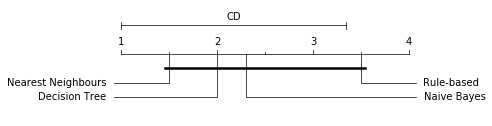

In [20]:
#draw the Nemenyi diagarm
alg_names = ["Decision Tree", "Nearest Neighbours", "Naive Bayes", "Rule-based"]
graph_ranks(avranks= avgrank, names = alg_names, cd = critical_diff)